In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 13

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [11]:
fname,fnamey="x_12d.dat","y_12d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  L=D=",D)
x=data

N= 600   L=D= 12


(600, 12)
[  61.27759991  131.11971044 -101.38286051 -228.25332833 -134.17167608
  -60.44933947 -263.55367722  -13.14980176   33.43324393 -133.12981604
   30.99825086  -63.16979905]
[0.5608603 0.309137  0.0928226]
(600, 3)
[508.33321642   6.64177053 135.16586569]


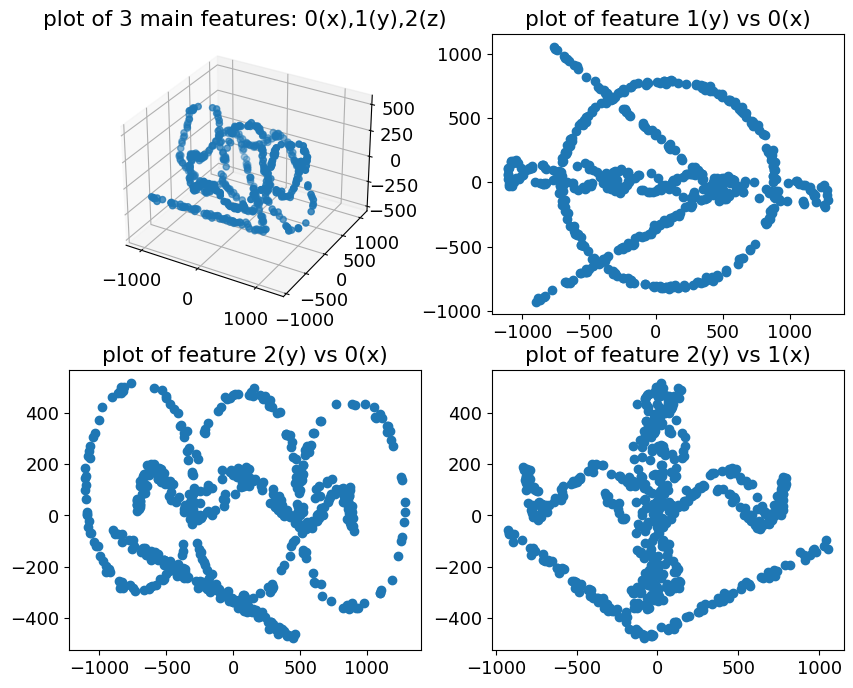

In [26]:
print(x.shape)
print(x[0])
pca=PCA(n_components=3)
pca.fit(x)
print(pca.explained_variance_ratio_)
x_red=pca.transform(x)
print(x_red.shape)
print(x_red[0])

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_title("plot of 3 main features: 0(x),1(y),2(z)")
ax1.scatter(x_red[:, 0], x_red[:, 1], x_red[:, 2])  # Pass entire transformed data
ax2 = fig.add_subplot(222)
ax2.set_title("plot of feature 1(y) vs 0(x)")
ax2.scatter(x_red[:,0],x_red[:,1])
ax3 = fig.add_subplot(223)
ax3.set_title("plot of feature 2(y) vs 0(x)")
ax3.scatter(x_red[:,0],x_red[:,2])
ax4 = fig.add_subplot(224)
ax4.set_title("plot of feature 2(y) vs 1(x)")
ax4.scatter(x_red[:,1],x_red[:,2])


plt.show()